In [1]:
%tensorflow_version 2.x

In [2]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-11-10 15:53:24--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-11-10 15:53:24--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc786de8be79b38ce21b5d4875c.dl.dropboxusercontent.com/cd/0/inline/BC-ooNXZWBymOKHQ6cYrjNxF6iTMJzu6O61qL-ZcI8_g1MGjq9IW06Dzv-QRU69U2ObetsQ0PVofKLodnTxtYsekQNECYZSDHYtyK4MBE0j0eQ/file# [following]
--2020-11-10 15:53:24--  https://ucc786de8be79b38ce21b5d4875c.dl.dropboxusercontent.com/cd/0/inline/BC-ooNXZWBymOKHQ6cYrjNxF6iTMJzu6O61qL-ZcI8_g1

In [3]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  
  inflating: train/c7/img_57733.jpg  

In [5]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [6]:
len(os.listdir('test'))

79726

In [7]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


No. of train images = 22,424
No. of test images = 79,726

In [8]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Test directory
%mkdir Test

In [13]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'
    
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [15]:
type(test_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [16]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [17]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 112s 201ms/step - loss: 2.2960 - accuracy: 0.2234 - val_loss: 1.7324 - val_accuracy: 0.3926
Epoch 2/10
560/560 [==============================] - 111s 199ms/step - loss: 1.8877 - accuracy: 0.3749 - val_loss: 1.7254 - val_accuracy: 0.4904
Epoch 3/10
560/560 [==============================] - 113s 201ms/step - loss: 1.8147 - accuracy: 0.4471 - val_loss: 1.5265 - val_accuracy: 0.5199
Epoch 4/10
560/560 [==============================] - 110s 196ms/step - loss: 1.7781 - accuracy: 0.4436 - val_loss: 1.8494 - val_accuracy: 0.3656
Epoch 5/10
560/560 [==============================] - 110s 197ms/step - loss: 1.6223 - accuracy: 0.4954 - val_loss: 1.3237 - val_accuracy: 0.5703
Epoch 6/10
560/560 [==============================] - 109s 195ms/step - loss: 1.5089 - accuracy: 0.5608 - val_loss: 1.4084 - val_accuracy: 0.4846
Epoch 7/10
560/560 [==============================] - 110s 196ms/step - loss: 1.4711 - accuracy: 0.5662 - val_loss: 1.2217 -

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [19]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [20]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [22]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 111s 199ms/step - loss: 2.0094 - accuracy: 0.3296 - val_loss: 1.7865 - val_accuracy: 0.4013
Epoch 2/10
560/560 [==============================] - 111s 198ms/step - loss: 1.1536 - accuracy: 0.5879 - val_loss: 1.2712 - val_accuracy: 0.5658
Epoch 3/10
560/560 [==============================] - 111s 199ms/step - loss: 0.8559 - accuracy: 0.6988 - val_loss: 0.6589 - val_accuracy: 0.7754
Epoch 4/10
560/560 [==============================] - 111s 198ms/step - loss: 0.6678 - accuracy: 0.7751 - val_loss: 0.3544 - val_accuracy: 0.8962
Epoch 5/10
560/560 [==============================] - 111s 198ms/step - loss: 0.5482 - accuracy: 0.8173 - val_loss: 0.3453 - val_accuracy: 0.8786
Epoch 6/10
560/560 [==============================] - 111s 197ms/step - loss: 0.4733 - accuracy: 0.8435 - val_loss: 0.3575 - val_accuracy: 0.8779
Epoch 7/10
560/560 [==============================] - 111s 197ms/step - loss: 0.4425 - accuracy: 0.8556 - val_loss: 0.1760 -

In [23]:
%matplotlib inline  
import matplotlib.pyplot as plt

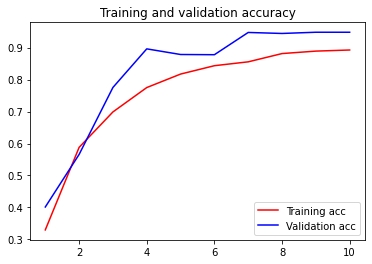

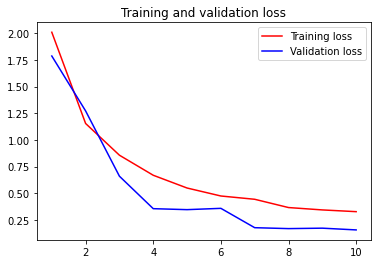

In [24]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
39863/39863 [==============================] - 364s 9ms/step


In [26]:
pred

array([[1.0421941e-05, 1.9729237e-07, 9.2608032e-05, ..., 2.0917832e-05,
        3.9243797e-04, 9.0023980e-04],
       [1.2551716e-05, 2.5947618e-06, 1.4875907e-05, ..., 6.7772972e-03,
        2.0889845e-03, 2.5026449e-05],
       [6.2068123e-01, 7.6348133e-02, 5.8025136e-05, ..., 7.2861295e-03,
        1.3589284e-02, 2.7978843e-01],
       ...,
       [2.5623996e-04, 4.3499327e-05, 1.8593888e-05, ..., 1.0443080e-04,
        5.5417370e-02, 1.1453730e-02],
       [1.1032451e-08, 6.8647593e-10, 4.7198287e-03, ..., 3.9072984e-06,
        6.4306054e-04, 6.4529850e-08],
       [4.8005777e-06, 5.9629713e-07, 3.0382654e-07, ..., 1.0770149e-06,
        9.4977738e-03, 8.9034081e-02]], dtype=float32)

In [27]:
len(pred)

79726

In [28]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,1.042194e-05,1.972924e-07,9.260803e-05,2.892235e-07,7.976184e-06,9.985709e-01,0.000004,0.000021,0.000392,9.002398e-04
1,1.255172e-05,2.594762e-06,1.487591e-05,8.282438e-06,5.015025e-03,9.838253e-01,0.002230,0.006777,0.002089,2.502645e-05
2,6.206812e-01,7.634813e-02,5.802514e-05,1.703518e-03,4.093807e-04,6.115335e-05,0.000075,0.007286,0.013589,2.797884e-01
3,8.943909e-04,4.768395e-04,7.720525e-05,3.112410e-06,5.897045e-03,3.607740e-04,0.015813,0.007002,0.736284,2.331915e-01
4,2.372795e-03,3.567220e-06,4.890683e-07,4.452289e-02,8.996247e-01,2.150011e-03,0.001255,0.000077,0.049046,9.471892e-04
...,...,...,...,...,...,...,...,...,...,...
79721,2.776845e-04,9.787971e-01,3.693707e-04,1.724613e-06,1.589343e-06,6.555008e-05,0.001096,0.009142,0.006363,3.885803e-03
79722,4.570099e-03,9.795322e-01,9.834292e-06,7.645060e-03,1.257222e-05,4.287762e-06,0.001264,0.000021,0.000207,6.734217e-03
79723,2.562400e-04,4.349933e-05,1.859389e-05,1.376261e-04,9.292176e-01,1.012226e-04,0.003250,0.000104,0.055417,1.145373e-02
79724,1.103245e-08,6.864759e-10,4.719829e-03,1.235187e-12,6.809850e-08,1.193706e-10,0.994633,0.000004,0.000643,6.452985e-08


In [29]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [30]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>